# Bienvenidos a la Clase 7 de ICDP

En esta quinta parte continuamos con el uso de la librería pandas para creación y manejo de datasets, además de trabajar con las diferentes estructuras de datos, manejar y conocer las diferentes opciones en cada tipo de estructura, sus coincidencias y diferencias.

In [1]:
import pandas as pd

En esta clase usaremos el conjunto de datos titanic almacenado como CSV. Los datos constan de las siguientes columnas de datos:

* PassengerId: Id de cada pasajero.
* Survived: esta característica tiene valor 0 y 1. 0 para no sobrevivido y 1 para sobrevivido.
* Pclass: Hay 3 clases: Clase 1, Clase 2 y Clase 3.
* Name: Nombre del pasajero.
* Name: Género del pasajero.
* Age: Edad del pasajero.
* SibSp: Indicación de que el pasajero tiene hermanos y cónyuge.
* Parch: si un pasajero está solo o tiene familia.
* Ticket: número de ticket del pasajero.
* Fare: Indicando la tarifa.
* Cabin: La cabina del pasajero.
* Embarked: La categoría embarcado.

In [2]:
titanic = pd.read_csv("titanic.csv")

Además de `titanic.csv` usaremos datos de calidad del aire sobre NO2 y partículas de menos de 2,5 micrómetros, disponibles por https://openaq.org/ y utilizando el siguiente paquete http://dhhagan.github.io/py-openaq/index.html. El conjunto de datos es `air_quality_long.csv` proporciona valores de NO2 y PM25 para las estaciones de medición FR04014, BETR801 y London Westminster en París, Amberes y Londres, respectivamente.

El conjunto de datos de calidad del aire tiene las siguientes columnas:

* city: ciudad donde se utiliza el sensor, ya sea París, Amberes o Londres
* country: país donde se utiliza el sensor, ya sea FR, BE o GB
* location: la identificación del sensor, ya sea FR04014, BETR801 o London Westminster
* parameter: el parámetro medido por el sensor, ya sea NO2 o material particulado
* value: el valor medido
* unit: la unidad del parámetro medido, en este caso "µg/m³"

y el índice del `DataFrame` es `datetime`, la fecha y hora de la medición.

In [3]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv", parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv", parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location","parameter", "value"]]

### Cómo combinar datos de varias tablas?
#### Concatenando objetos
<img src="https://pandas.pydata.org/pandas-docs/version/1.0.3/_images/08_concat_row1.svg" width="70%" height="70%">

Quiero combinar las medidas de NO2 y PM25, dos tablas con una estructura similar, en una sola tabla:

In [4]:
air_quality_pm25.head()

date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [5]:
air_quality_no2.head()

date.utc location parameter  value
0  2019-06-21 00:00:00+00:00  FR04014       no2   20.0
1  2019-06-20 23:00:00+00:00  FR04014       no2   21.8
2  2019-06-20 22:00:00+00:00  FR04014       no2   26.5
3  2019-06-20 21:00:00+00:00  FR04014       no2   24.9
4  2019-06-20 20:00:00+00:00  FR04014       no2   21.4

In [46]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2])
air_quality.head()

date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [47]:
air_quality.shape

(3178, 4)

La función `concat()` realiza operaciones de concatenación de varias tablas a lo largo de uno de los ejes (por filas o por columnas).

Por defecto, la concatenación está a lo largo del eje 0, por lo que la tabla resultante combina las filas de las tablas de entrada. Revisemos la forma del original y las tablas concatenadas para verificar la operación:

In [15]:
print('Forma de la tabla `air_quality_pm25`: ', air_quality_pm25.shape)

print('Forma de la tabla `air_quality_no2`: ', air_quality_no2.shape)

print('Forma de la tabla resultado `air_quality`: ', air_quality.shape)

Forma de la tabla `air_quality_pm25`:  (1110, 4)
Forma de la tabla `air_quality_no2`:  (2068, 4)
Forma de la tabla resultado `air_quality`:  (3178, 4)


Por tanto, la tabla resultante tiene 3178 = 1110 + 2068 filas.

<div class="alert alert-block alert-info">
<b>Nota:</b> El argumento del eje regresará en varios métodos pandas que se pueden aplicar a lo largo de un eje. Un DataFrame tiene dos ejes correspondientes: el primero se ejecuta verticalmente hacia abajo en las filas (axis=0) y el segundo se ejecuta horizontalmente en las columnas (axis=1). La mayoría de las operaciones, como la concatenación o las estadísticas de resumen, se realizan de forma predeterminada en las filas (axis=0), pero también se pueden aplicar en las columnas.
</div>

Ordenar la tabla según la información de fecha y hora también ilustra la combinación de ambas tablas, con la columna de `parameter` que define el origen de la tabla (ya sea `no2` de la tabla `air_quality_no2` o `pm25` de la tabla `air_quality_pm25`):

In [20]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

date.utc            location parameter  value
1109  2019-05-07 01:00:00+00:00  London Westminster      pm25    8.0
100   2019-05-07 01:00:00+00:00             BETR801      pm25   12.5
2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0
1003  2019-05-07 01:00:00+00:00             FR04014       no2   25.0
1098  2019-05-07 01:00:00+00:00             BETR801       no2   50.5

En este ejemplo específico, la columna de parámetros proporcionada por los datos asegura que se pueda identificar cada una de las tablas originales. Este no es siempre el caso. la función concat proporciona una solución conveniente con el argumento de claves, agregando un índice de fila adicional (jerárquico). Por ejemplo:

In [22]:
air_quality_pm25.head()

date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [24]:
air_quality_no2.head()

date.utc location parameter  value
0  2019-06-21 00:00:00+00:00  FR04014       no2   20.0
1  2019-06-20 23:00:00+00:00  FR04014       no2   21.8
2  2019-06-20 22:00:00+00:00  FR04014       no2   26.5
3  2019-06-20 21:00:00+00:00  FR04014       no2   24.9
4  2019-06-20 20:00:00+00:00  FR04014       no2   21.4

In [28]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2],keys=["PM25", "NO2"])
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

<div class="alert alert-block alert-info">
<b>Nota:</b> La existencia de múltiples índices de fila/columna al mismo tiempo no se ha mencionado en este curso. La indexación jerárquica o MultiIndex es una función de pandas avanzada y poderosa para analizar datos de mayor dimensión.
La indexación múltiple está fuera del alcance de esta introducción a pandas. Por el momento, recuerde que la función reset_index se puede utilizar para convertir cualquier nivel de un índice en una columna, p. Ej. air_quality.reset_index(level=0)
</div>

Sentite libre de sumergirte en el mundo de la indexación múltiple en la sección de la guía del usuario sobre indexación avanzada: https://pandas.pydata.org/docs/user_guide/advanced.html#advanced

En la sección sobre concatenación de objetos se proporcionan más opciones sobre la concatenación de tablas (filas y columnas) y cómo se puede usar concat para definir la lógica (unión o intersección) de los índices en los otros ejes: https://pandas.pydata.org/docs/user_guide/merging.html#merging-concat

### Unir tablas usando un identificador común
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg" width="70%" height="70%">

Agregue las coordenadas de la estación, proporcionadas por la tabla de metadatos de las estaciones, a las filas correspondientes en la tabla de medidas

In [29]:
stations_coord = pd.read_csv("air_quality_stations.csv")
stations_coord.head()

location  coordinates.latitude  coordinates.longitude
0  BELAL01              51.23619                4.38522
1  BELHB23              51.17030                4.34100
2  BELLD01              51.10998                5.00486
3  BELLD02              51.12038                5.02155
4  BELR833              51.32766                4.36226

In [30]:
stations_coord.shape

(66, 3)

In [31]:
air_quality.head()

date.utc            location parameter  value
1109  2019-05-07 01:00:00+00:00  London Westminster      pm25    8.0
100   2019-05-07 01:00:00+00:00             BETR801      pm25   12.5
2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0
1003  2019-05-07 01:00:00+00:00             FR04014       no2   25.0
1098  2019-05-07 01:00:00+00:00             BETR801       no2   50.5

In [32]:
air_quality.shape

(3178, 4)

In [33]:
air_quality_f = pd.merge(air_quality, stations_coord, how='left', on='location')
air_quality_f.head()

date.utc            location parameter  value  \
0  2019-05-07 01:00:00+00:00  London Westminster      pm25    8.0   
1  2019-05-07 01:00:00+00:00             BETR801      pm25   12.5   
2  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0   
3  2019-05-07 01:00:00+00:00             FR04014       no2   25.0   
4  2019-05-07 01:00:00+00:00             FR04014       no2   25.0   

   coordinates.latitude  coordinates.longitude  
0              51.49467               -0.13193  
1              51.20966                4.43182  
2              51.49467               -0.13193  
3              48.83724                2.39390  
4              48.83722                2.39390

Usando la función `merge()`, para cada una de las filas en la tabla `air_quality`, se agregan las coordenadas correspondientes de la tabla `air_quality_stations_coord`. Ambas tablas tienen en común la columna `location` que se utiliza como clave para combinar la información. Al elegir la combinación de la izquierda, solo las ubicaciones disponibles en la tabla `air_quality`(izquierda), es decir, FR04014, BETR801 y London Westminster, terminan en la tabla resultante. La función `merge()` admite múltiples opciones de combinación similares a las operaciones de estilo de base de datos.

Agregue la descripción completa y el nombre del parámetro, proporcionado por la tabla de metadatos de parámetros, a la tabla de medidas:

In [49]:
air_quality_parameters = pd.read_csv("air_quality_parameters.csv")
air_quality_parameters.head()

id                                        description  name
0    bc                                       Black Carbon    BC
1    co                                    Carbon Monoxide    CO
2   no2                                   Nitrogen Dioxide   NO2
3    o3                                              Ozone    O3
4  pm10  Particulate matter less than 10 micrometers in...  PM10

In [50]:
#Renombrar columnas
# air_quality_parameters.rename(columns={"id":"parameter"}, inplace=True)

In [51]:
air_quality_parameters.head()

id                                        description  name
0    bc                                       Black Carbon    BC
1    co                                    Carbon Monoxide    CO
2   no2                                   Nitrogen Dioxide   NO2
3    o3                                              Ozone    O3
4  pm10  Particulate matter less than 10 micrometers in...  PM10

In [52]:
air_quality_parameters.shape

(7, 3)

In [53]:
air_quality = pd.merge(air_quality, air_quality_parameters,how='left', left_on='parameter', right_on='id')

In [54]:
air_quality.head()

date.utc location parameter  value    id  \
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0  pm25   
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5  pm25   
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5  pm25   
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0  pm25   
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5  pm25   

                                         description   name  
0  Particulate matter less than 2.5 micrometers i...  PM2.5  
1  Particulate matter less than 2.5 micrometers i...  PM2.5  
2  Particulate matter less than 2.5 micrometers i...  PM2.5  
3  Particulate matter less than 2.5 micrometers i...  PM2.5  
4  Particulate matter less than 2.5 micrometers i...  PM2.5

En comparación con el ejemplo anterior, no existe un nombre de columna común. Sin embargo, la columna `parameter` en la tabla `air_quality` y la columna `id` en `air_quality_parameters_name` proporcionan la variable medida en un formato común. Los argumentos `left_on` y `right_on` se utilizan aquí (en lugar de solo `on`) para establecer el vínculo entre las dos tablas.

__pandas__ también admite uniones internas, externas y derechas. Se proporciona más información sobre la unión/merge de tablas en la sección de la guía del usuario sobre el merge de tablas de estilo de base de datos aquí: https://pandas.pydata.org/docs/user_guide/merging.html#merging-join
O la página de comparación con SQL aquí: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join

<div class="alert alert-block alert-info">
<b>Recuerda:</b>
    <ul>
        <li>Se pueden concatenar varias tablas tanto en columnas como en filas utilizando la función concat.</li>
        <li>Para hacer merge o unir tablas como una base de datos, utilice la función merge.</li>
    </ul>
</div>

Consulte la guía del usuario para obtener una descripción completa de las diversas funciones para combinar tablas de datos: https://pandas.pydata.org/docs/user_guide/merging.html#merging

In [55]:
import matplotlib.pyplot as plt

air_quality = pd.read_csv("air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={"date.utc": "datetime"})


In [56]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### Cómo manejar datos de series temporales con facilidad?
#### Usando las propiedades de fecha y hora de pandas

Quiero trabajar con las fechas en la columna `datetime` como objetos de fecha y hora en lugar de texto sin formato

In [60]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"].head()

0   2019-06-21 00:00:00+00:00
1   2019-06-20 23:00:00+00:00
2   2019-06-20 22:00:00+00:00
3   2019-06-20 21:00:00+00:00
4   2019-06-20 20:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]

Inicialmente, los valores de `datetime` son cadenas de caracteres y no proporcionan ninguna operación de fecha y hora (por ejemplo, extraer el año, el día de la semana,…). Al aplicar la función `to_datetime`, pandas interpretan las cadenas y las convierten en objetos de fecha y hora (es decir, `datetime64[ns, UTC]`). En pandas llamamos a estos objetos de fecha y hora similares a `datetime.datetime` de la biblioteca estándar como `pandas.Timestamp`.

<div class="alert alert-block alert-info">
<b>Nota:</b> Como muchos conjuntos de datos contienen información de fecha y hora en una de las columnas, la función de entrada de pandas como <b>pandas.read_csv()</b> y <b>pandas.read_json()</b> pueden hacer la transformación a fechas al leer los datos usando el parámetro <i>parse_dates</i> con una lista de las columnas a leer como Timestamp:
</div>

In [62]:
air_quality_no2_long = pd.read_csv("air_quality_no2_long.csv", parse_dates=["date.utc"])
air_quality_no2_long["date.utc"].head()

0   2019-06-21 00:00:00+00:00
1   2019-06-20 23:00:00+00:00
2   2019-06-20 22:00:00+00:00
3   2019-06-20 21:00:00+00:00
4   2019-06-20 20:00:00+00:00
Name: date.utc, dtype: datetime64[ns, UTC]

Por qué son útiles estos objetos `pandas.Timestamp`? Ilustremos el valor agregado con algunos casos de ejemplo.

Cuál es la fecha de inicio y finalización del conjunto de datos de series de tiempo con el que estamos trabajando?

In [63]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

El uso de `pandas.Timestamp` para fechas y horas nos permite calcular con información de fechas y hacerlas comparables. Por lo tanto, podemos usar esto para obtener la longitud de nuestra serie de tiempo:

In [64]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

El resultado es un objeto `pandas.Timedelta`, similar a `datetime.timedelta` de la biblioteca estándar de Python y que define una duración de tiempo.

Los diversos conceptos de tiempo admitidos por pandas se explican en la sección de la guía del usuario sobre conceptos relacionados con el tiempo: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-overview

Quiero agregar una nueva columna al DataFrame que contiene solo el mes de la medición:

In [65]:
air_quality["month"] = air_quality["datetime"].dt.month

air_quality.head()

city country                  datetime location parameter  value   unit  \
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³   
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³   
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³   
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³   
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³   

   month  
0      6  
1      6  
2      6  
3      6  
4      6

Al utilizar objetos de marca de tiempo para las fechas, pandas proporciona muchas propiedades relacionadas con el tiempo. Por ejemplo, el mes, pero también el año, la semana del año, el trimestre, etc. Todas estas propiedades son accesibles por el accesor dt.

En la tabla de resumen de componentes de fecha y hora se ofrece una descripción general de las propiedades de fecha existentes: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components.
Más detalles sobre el descriptor de acceso dt para devolver propiedades similares a la fecha y hora se explican en una sección dedicada al descriptor de acceso dt: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors

Cuál es la concentración promedio de NO2 para cada día de la semana para cada uno de los lugares de medición?

In [66]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

¿Recuerdas el patrón dividir-aplicar-combinar proporcionado por groupby sobre cálculo de estadísticas de la clase anterior? Aquí, queremos calcular una estadística determinada (por ejemplo, NO2 medio) __para cada día de la semana y para cada ubicación de medición__. Para agrupar en días de semana, usamos la propiedad datetime _weekday_ (con Monday=0 y Sunday=6) de pandas `Timestamp`, a la que también puede acceder el descriptor de acceso `dt`. La agrupación en ubicaciones y días de semana se puede realizar para dividir el cálculo de la media en cada una de estas combinaciones.

<div class="alert alert-block alert-danger">
<b>Cuidado:</b> Como estamos trabajando con una serie de tiempo muy corta en estos ejemplos, el análisis no proporciona un resultado representativo a largo plazo.
</div>

Trace el patrón típico de NO2 durante el día de nuestra serie de tiempo de todas las estaciones juntas. En otras palabras, ¿cuál es el valor medio de cada hora del día?

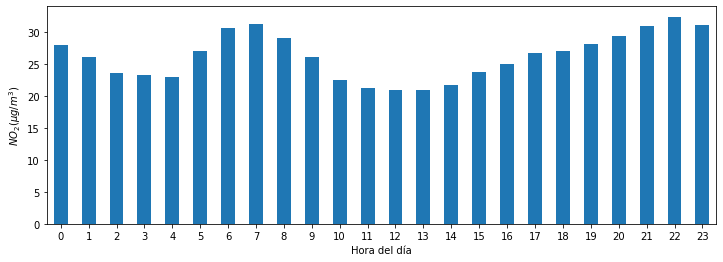

In [67]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar',rot=0,ax=axs)

plt.xlabel("Hora del día");  # Personalizando la etiqueta del eje x
plt.ylabel("$NO_2 (µg/m^3)$");

Al igual que en el caso anterior, queremos calcular una estadística dada (por ejemplo, NO2 medio) __para cada hora del día__ y podemos usar el enfoque dividir-aplicar-combinar nuevamente. Para este caso, usamos la propiedad datetime `hour` de pandas `Timestamp`, a la que también puede acceder el descriptor de acceso `dt`.

### Datetime como índice

En la clase sobre reshape, se introdujo `pivot()` para remodelar la tabla de datos con cada una de las ubicaciones de las mediciones como una columna separada:

In [68]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location                   BETR801  FR04014  London Westminster
datetime                                                       
2019-05-07 01:00:00+00:00     50.5     25.0                23.0
2019-05-07 02:00:00+00:00     45.0     27.7                19.0
2019-05-07 03:00:00+00:00      NaN     50.4                19.0
2019-05-07 04:00:00+00:00      NaN     61.9                16.0
2019-05-07 05:00:00+00:00      NaN     72.4                 NaN

<div class="alert alert-block alert-info">
<b>Nota:</b> Al girar los datos, la información de fecha y hora se convirtió en el índice de la tabla. En general, la función <i>set_index</i> puede lograr establecer una columna como índice.
</div>

Trabajar con un índice de fecha y hora (es decir, DatetimeIndex) proporciona potentes funcionalidades. Por ejemplo, no necesitamos el descriptor de acceso `dt` para obtener las propiedades de la serie temporal, pero tenemos estas propiedades disponibles en el índice directamente:

In [69]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Algunas otras ventajas son el subconjunto conveniente del período de tiempo o la escala de tiempo adaptada en los gráficos. Apliquemos esto a nuestros datos.

Crea un gráfico de los valores de NO2 en las diferentes estaciones desde el 20 de mayo hasta finales del 21 de mayo

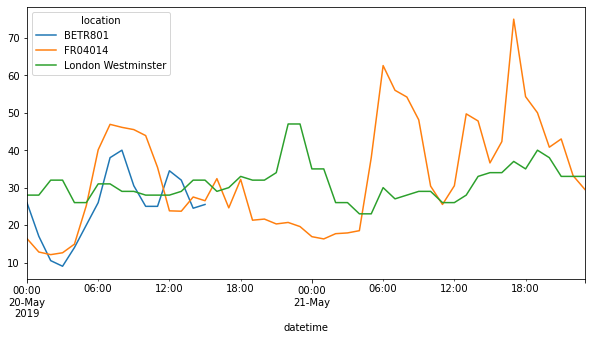

In [70]:
no_2.tz_localize(None)["2019-05-20":"2019-05-21"].plot(figsize=(10, 5));

Al proporcionar una cadena que analiza una fecha y hora, se puede seleccionar un subconjunto específico de los datos en un DatetimeIndex.

Se proporciona más información sobre DatetimeIndex y la división mediante cadenas en la sección sobre indexación de series de tiempo: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-datetimeindex

### Remuestrear una serie de tiempo a otra frecuencia
Agregue los valores actuales de las series de tiempo por hora al valor máximo mensual en cada una de las estaciones.

In [71]:
monthly_max = no_2.resample("M").max()
monthly_max

location                   BETR801  FR04014  London Westminster
datetime                                                       
2019-05-31 00:00:00+00:00     74.5     97.0                97.0
2019-06-30 00:00:00+00:00     52.5     84.7                52.0

Un método muy poderoso sobre datos de series de tiempo con un índice de fecha y hora es la capacidad de volver a muestrear `resample()` series de tiempo a otra frecuencia (por ejemplo, convertir datos en segundo lugar en datos de 5 minutos).

El método resample () es similar a una operación groupby:

* Proporciona una agrupación basada en el tiempo, mediante el uso de una cadena (por ejemplo, M, 5H, ...) que define la frecuencia objetivo.
* Requiere una función de agregación como mean, max, etc.

En la tabla de descripción general de alias de desplazamiento se ofrece una descripción general de los alias utilizados para definir las frecuencias de series de tiempo: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases.

Cuando se define, la frecuencia de la serie temporal la proporciona el atributo `freq`:

In [72]:
monthly_max.index.freq

<MonthEnd>

Haga una gráfica del valor medio diario de NO2 en cada una de las estaciones.

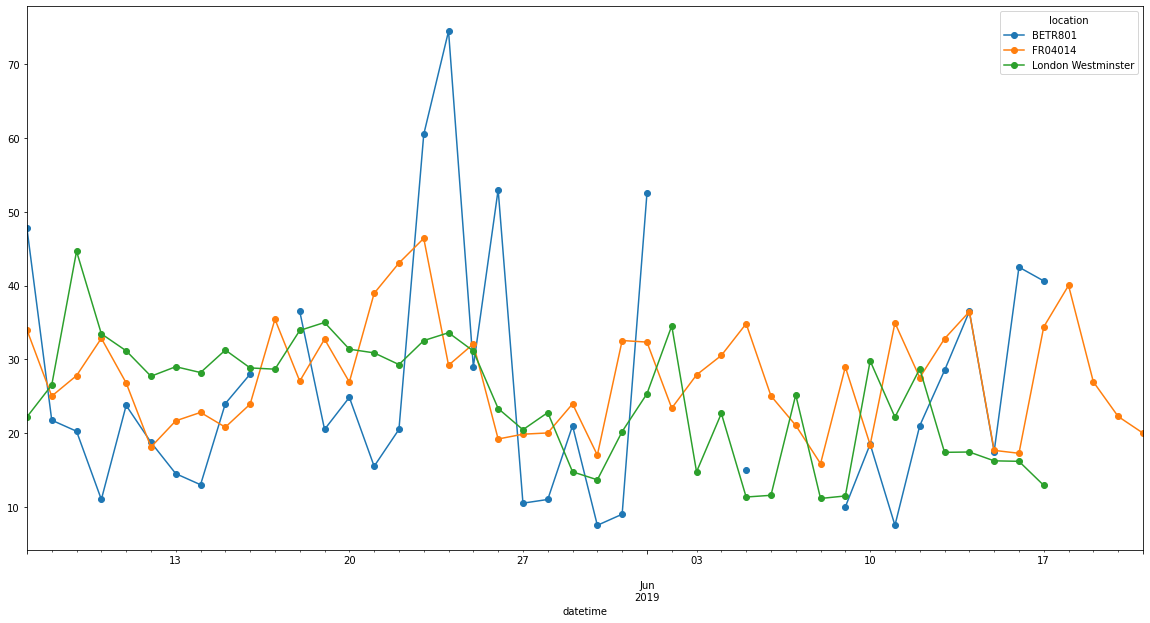

In [77]:
no_2.tz_localize(None).resample("D").mean().plot(style="-o", figsize=(20, 10));

Se proporcionan más detalles sobre el poder del remuestreo de series de tiempo en la sección de la guía del usuario sobre remuestreo: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-resampling

<div class="alert alert-block alert-info">
<b>Recuerda:</b>
    <ul>
        <li>Las cadenas de fechas válidas se pueden convertir en objetos de fecha y hora utilizando la función <b>to_datetime</b> o como parte de las funciones de lectura.</li>
        <li>Los objetos de fecha y hora en pandas admiten cálculos, operaciones lógicas y propiedades convenientes relacionadas con la fecha utilizando el descriptor de acceso <b>dt</b>.</li>
        <li>Un <b>DatetimeIndex</b> contiene estas propiedades relacionadas con la fecha y admite una división conveniente.</li>
        <li><b>Remuestrear</b> es un método poderoso para cambiar la frecuencia de una serie de tiempo.</li>
    </ul>
</div>

En las páginas sobre series temporales y funcionalidad de fecha se ofrece una descripción completa de las series temporales: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries.

### Cómo manipular datos textuales?

Ponga todos los caracteres del nombre en minúsculas

In [80]:
titanic["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [78]:
titanic["Name"].str.lower().head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object

Para que cada una de las cadenas de la columna `Name` esté en minúsculas, seleccione la columna `Name`, agregue el descriptor de acceso `str` y aplique el método `lower`. Como tal, cada una de las cadenas se convierte en elemento.

Similar a los objetos de fecha y hora que tienen un descriptor de acceso `dt`, hay varios métodos de cadena especializados disponibles cuando se usa el descriptor de acceso `str`. Estos métodos tienen, en general, nombres coincidentes con los métodos de cadena incorporados equivalentes para elementos individuales, pero se aplican por elementos en cada uno de los valores de las columnas.

Crea una nueva columna `Surname` que contenga el apellido de los Pasajeros extrayendo la parte antes de la coma.

In [81]:
titanic["Name"].str.split(",").head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

Con el método `Series.str.split()`, cada uno de los valores se devuelve como una lista de 2 elementos. El primer elemento es la parte anterior a la coma y el segundo elemento es la parte posterior a la coma.

In [84]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object

Como solo nos interesa la primera parte que representa el apellido (elemento 0), podemos usar nuevamente el descriptor de acceso `str` y aplicar `Series.str.get()` para extraer la parte relevante. De hecho, estas funciones de cadena se pueden concatenar para combinar múltiples funciones a la vez.

Hay más información disponible sobre la extracción de partes de cadenas en la sección de la guía del usuario sobre cómo dividir y reemplazar cadenas: https://pandas.pydata.org/docs/user_guide/text.html#text-split

Extraiga los datos de los pasajeros sobre la condesa a bordo del Titanic.

In [85]:
titanic["Name"].str.contains("Countess").head()

0    False
1    False
2    False
3    False
4    False
Name: Name, dtype: bool

In [86]:
titanic[titanic["Name"].str.contains("Countess")]

PassengerId  Survived  Pclass  \
759          760         1       1   

                                                  Name     Sex   Age  SibSp  \
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket  Fare Cabin Embarked Surname  
759      0  110152  86.5   B77        S  Rothes

El método de cadena `Series.str.contains()` comprueba cada uno de los valores en la columna `Name` si la cadena contiene la palabra `Countess` y devuelve para cada uno de los valores Verdadero (`Countess` es parte del nombre) y Falso (`Countess` no es parte del nombre). Esta salida se puede utilizar para subseleccionar los datos usando la indexación condicional (booleana) dada en clases anteriores. Como solo había una condesa en el Titanic, obtenemos una fila como resultado.

<div class="alert alert-block alert-info">
<b>Nota:</b> Se admiten extracciones más potentes en cadenas, ya que los métodos Series.str.contains() y Series.str.extract() aceptan expresiones regulares.
</div>

Hay más información disponible sobre la extracción de partes de cadenas en la sección de la guía del usuario sobre coincidencia y extracción de cadenas: https://pandas.pydata.org/docs/user_guide/text.html#text-extract

Qué pasajero del Titanic tiene el nombre más largo?

In [87]:
titanic["Name"].str.len().head()

0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64

Para obtener el nombre más largo, primero tenemos que obtener la longitud de cada uno de los nombres en la columna `Name`. Al usar métodos de cadena de pandas, la función `Series.str.len()` se aplica a cada uno de los nombres individualmente (por elementos).

In [88]:
titanic["Name"].str.len().idxmax()

307

A continuación, necesitamos obtener la ubicación correspondiente, preferiblemente la etiqueta de índice, en la tabla para la que la longitud del nombre es mayor. El método `idxmax()` hace exactamente eso. No es un método de cadena y se aplica a números enteros, por lo que no se usa `str`.

In [89]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

Basándonos en el nombre del índice de la fila (307) y la columna (Name), podemos hacer una selección usando el operador loc, explicado en clases anteriores.

En la columna "Sex", reemplace los valores de "male" por "M" y los valores de "female" por "F":

In [90]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M","female": "F"})
titanic["Sex_short"].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex_short, dtype: object

Mientras que `replace()` no es un método de cadena, proporciona una forma conveniente de usar mapeos o vocabularios para traducir ciertos valores. Requiere un diccionario para definir el mapeo `{de: a}`.

<div class="alert alert-block alert-warning">
<b>Alerta:</b> También hay un método replace() disponible para reemplazar un conjunto específico de caracteres. Sin embargo, al tener un mapeo de múltiples valores, esto se convertiría en:
</div>

In [91]:
titanic["Sex_short"] = titanic["Sex"].str.replace("female", "F")
titanic["Sex_short"] = titanic["Sex_short"].str.replace("male", "M")

In [92]:
titanic["Sex_short"].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex_short, dtype: object

Esto se volvería complicado y conduciría fácilmente a errores. Prueba lo que sucedería si esas dos declaraciones se aplican en el orden opuesto...

<div class="alert alert-block alert-info">
<b>Recuerda:</b>
    <ul>
        <li>Los métodos de cadena están disponibles usando el descriptor de acceso str.</li>
        <li>Los métodos de cadena funcionan según los elementos y se pueden utilizar para la indexación condicional.</li>
        <li>El método replace() es un método conveniente para convertir valores de acuerdo con un diccionario dado.</li>
    </ul>
</div>

Se proporciona una descripción completa en las páginas de la guía del usuario sobre cómo trabajar con datos de texto aquí: https://pandas.pydata.org/docs/user_guide/text.html#text

### Ejercicios

#### Tema 1: (10p)
Usando el archivo titanic.csv, realizar lo siguiente:

* Usa la variable Name para crear la columna titulo (ej: Mr, Mrs, Master, etc).
* Imprime en un gráfico circular la distribución de títulos de todos los pasajeros del titanic. En este caso para la minoría crear un título "Otros"

In [1]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
titanic["titulos"] = titanic["Name"].apply(lambda x: x.split(",")[1].split(" ")[1])

In [28]:
titanic["titulos"].value_counts().describe(percentiles=[.8])

count     17.000000
mean      52.411765
std      130.154744
min        1.000000
50%        2.000000
80%       33.400000
max      517.000000
Name: titulos, dtype: float64

In [9]:
titanic["titulos_2"]=titanic["titulos"].apply(lambda x: "Otros" if x not in ["Mr.", "Miss.", "Mrs.", "Master."] else x)
titanic["titulos_2"]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886    Otros
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: titulos_2, Length: 891, dtype: object

In [14]:
import matplotlib.pyplot as plt

In [16]:
base=titanic[["titulos", "titulos_2"]].groupby("titulos_2").count().rename(columns={"titulos":"cantidad"}).reset_index()

In [17]:
base

titulos_2  cantidad
0   Master.        40
1     Miss.       182
2       Mr.       517
3      Mrs.       125
4     Otros        27

([<matplotlib.patches.Wedge at 0x2405e816fa0>,
 [Text(1.0890778794598113, 0.15462655810474746, 'Master.'),
  Text(0.6630801790605123, 0.8776814206402452, 'Miss.'),
  Text(-1.0666652452751546, -0.2687475665417166, 'Mr.'),
  Text(0.8880913917993408, -0.6490713980849178, 'Mrs.'),
  Text(1.0950191194286163, -0.10456159947981673, 'Otros')])

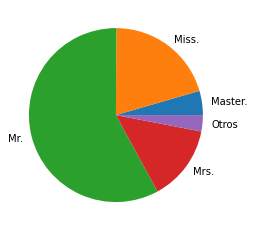

In [19]:
plt.pie(base["cantidad"], labels=base["titulos_2"])